k-NN 회귀 알고리즘의 한계

학습에 이용된 특성값과 매우 차이가 나는 값을 예측하라고 하면, 그 예측값은 학습 데이터 쪽으로 가게 될 것.

In [2]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

# 50센치 농어의 무게는 1.5kg이라 합니다. 모델은 얼마로 예측할까요?
knr.predict([[50]])

array([1033.33333333])

In [3]:
# 그럼 100센치 농어는?
knr.predict([[100]])

array([1033.33333333])

역시 학습 데이터만 갖고 예측하니 이런 일이 발생하네요

# 선형 회귀 (linear regression)

특성이 하나인 경우, 그 특성을 가장 잘 나타낼 수 있는 직선을 학습하는 알고리즘

사이킷런에서 선형 회귀를 구현해봅시다.

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input, train_target)

lr.predict([[50]])

array([1241.83860323])

우리가 만든 lr 모델이 어떤 직선을 찾았는지 알 수 있을까요

기울기(계수, 가중치) = coef_ 변수
y절편 = intercept_ 변수

*fit_intercept=False 로 설정하면 절편을 학습하지 않는다. (default=True*
*coef_ 속성은 특성에 대한 계수를 포함한 배열. 즉, 이 배열의 크기는 특성의 개수와 같다.*

기울기와 y절편과 같이 머신러닝 알고리즘이 찾아내는 값 --> 모델 파라미터

대부분의 머신러닝 알고리즘의 훈련 과정은 최적의 모델 파라미터를 찾는 것과 같다. --> 모델 기반 학습

k-NN 모델은 훈련 세트를 저장하는 것이 훈련의 전부 --> 사례 기반 학습

In [5]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


한번 농어의 길이 15~50까지 직선으로 구해봅시다.

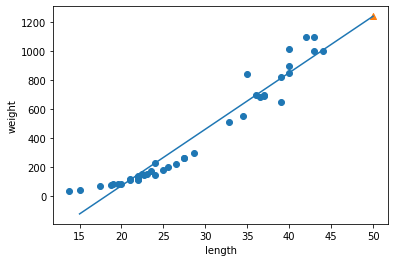

In [7]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

a = lr.coef_
b = lr.intercept_

# lr모델이 구한 직선
plt.plot([15, 50], [15*a+b, 50*a+b])

# 50cm 농어 데이터
plt.scatter(50, 1241.83860323, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

훈련 세트와 테스트 세트에 대한 R^2 점수도 구해보자

In [8]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


흠, 과대적합이라기엔 훈련 세트의 점수도 높지 않다 --> 전체적으로 과소적합

게다가, 길이가 어느 지점 이하로 내려가면, 무게를 음수로 예측하게 된다.

이를 해결하기 위해, 2차곡선 형태로 모델이 학습하면 좋겠다.

그러려면 x값(길이)의 제곱수도 훈련 세트에 추가되어야 한다.

In [9]:
train_poly = np.column_stack((train_input ** 2, train_input)) # ** 연산에 대한 브로드캐스팅
test_poly = np.column_stack((test_input ** 2, test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


제곱항이 추가되어 열이 하나 추가된 모습을 확인.

이제 모델을 구축해보고 길이 50cm 농어의 무게를 예측해보자 (단, 예측할 때에는, 훈련 세트와 마찬가지로 길이 제곱치 (2500)도 함께 넣어줘야 한다.)

In [10]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

lr.predict([[50**2, 50]])

array([1573.98423528])

절편과 계수도 출력해보자

In [11]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278276


근데, 2차방정식도 "선형"이라고 할 수 있을까?

길이^2 --> 왕길이로 치환하면, 무게는 왕길이와 길이의 선형 관계로 표현할 수 있다. --> 선형 회귀라고 할 수 있다.

이러한 다항식을 사용한 선형 회귀를 "다항 회귀"라고 부른다.

이를 산점도로 표현해보자

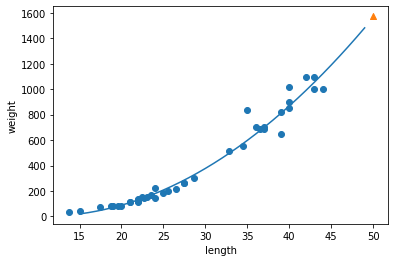

In [13]:
plt.scatter(train_input, train_target)

# 간격 1의 짧은 직선을 이어 그려서 곡선을 표현해보자.
point = np.arange(15, 50)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 예측 데이터
plt.scatter(50, 1573.98423528, marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

R^2 점수도 구해보자

In [16]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


조금 과소적합이 있는 것 같다 --> 좀 더 복잡한 모델이 필요!